In [1]:
from Maze_env import Maze_env
from reinforcement_learning import train_q_learning, show_final_solution, train_sarsa, plotting_rewards, show_final_state
import time

In [2]:
env = Maze_env()

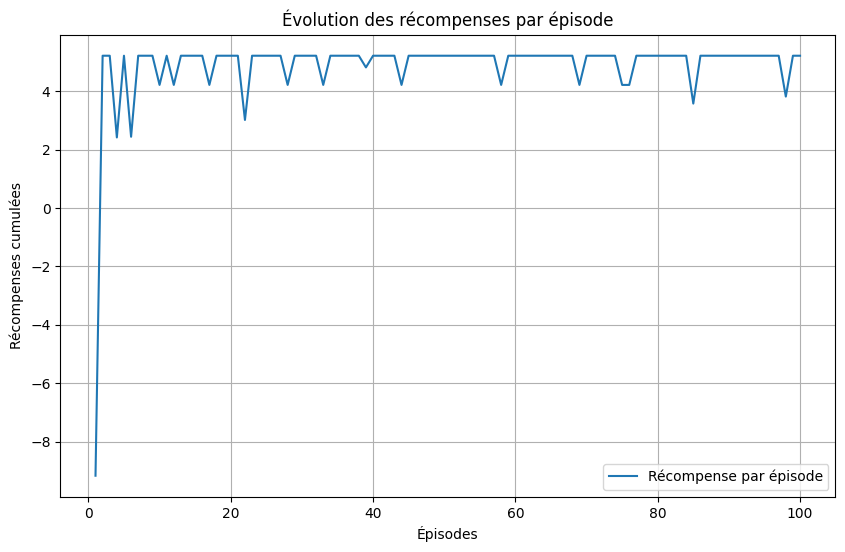

In [3]:
%matplotlib inline
q_table_q, rewards_list_q = train_q_learning(env, show_training=False)
plotting_rewards(rewards_list_q)


In [4]:
print(max(rewards_list_q[5:]))
print(min(rewards_list_q[5:]))

5.216990566028302
2.441211899974181


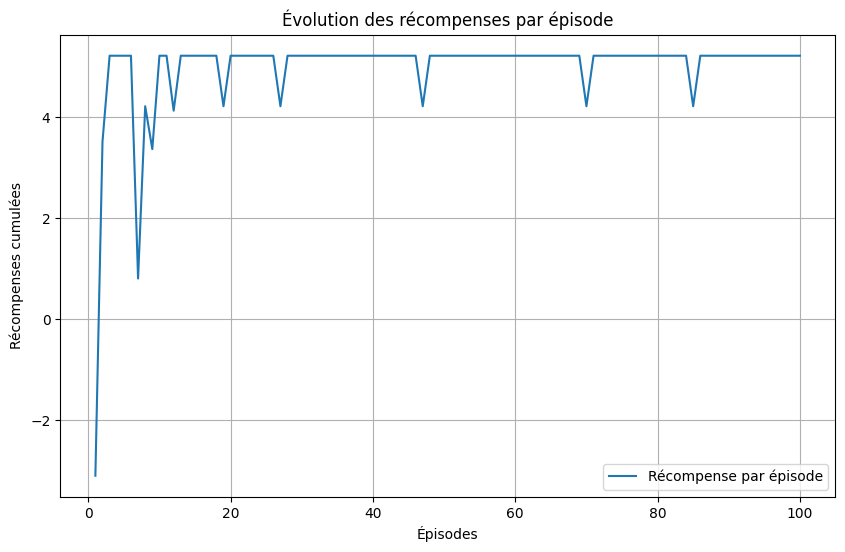

In [5]:
q_table_sarsa, rewards_list_sarsa = train_sarsa(env, show_training=False)
plotting_rewards(rewards_list_sarsa)

In [6]:
print(max(rewards_list_sarsa[5:]))
print(min(rewards_list_sarsa[5:]))

5.216990566028302
0.8053667519316807


In [7]:
def change_hyperparameters(learnin_type):
    alphas = [0.01, 0.05, 0.1, 0.2]
    gammas = [0.85, 0.9, 0.95, 0.99]
    epsilons = [0.1, 0.2, 0.3, 0.4]
    episodes = [50, 100, 200, 300]

    best_rewards = []
    worst_rewards = []

    # Variables pour suivre le meilleur entraînement
    best_overall_reward = float(-500)  # Initialise avec la valeur la plus basse possible
    best_parameters = None
    best_q_table = None

    start_time = time.time()

    for alpha in alphas:
        for gamma in gammas:
            for epsilon in epsilons:
                for episode in episodes:
                    if learnin_type == 'Q':
                        q_table, rewards_list = train_q_learning(env, alpha=alpha, gamma=gamma, epsilon=epsilon, episodes=episode, show_training=False)
                    elif learnin_type == 'SARSA':
                        q_table, rewards_list = train_sarsa(env, alpha=alpha, gamma=gamma, epsilon=epsilon, episodes=episode, show_training=False)
                    else:
                        print("Invalid learning type")
                        break

                    # Sauvegarder les récompenses
                    current_best_reward = max(rewards_list[5:])
                    current_worst_reward = min(rewards_list[5:])
                    best_rewards.append(current_best_reward)
                    worst_rewards.append(current_worst_reward)

                    # Mettre à jour les meilleurs paramètres
                    if current_best_reward > best_overall_reward:
                        best_overall_reward = current_best_reward
                        best_parameters = {
                            'alpha': alpha,
                            'gamma': gamma,
                            'epsilon': epsilon,
                            'episodes': episode,
                            'reward': best_overall_reward
                        }
                        best_q_table = q_table

    total_time = time.time() - start_time
    print(f"Total time: {total_time}")
    print(f"Best parameters: {best_parameters}")

    return best_rewards, worst_rewards, best_parameters, best_q_table

In [9]:
learnin_type = 'q'
best_rewards_q, worst_rewards_q, best_parameters_q, best_q_table_q = change_hyperparameters('Q')

Total time: 7.349342346191406
Best parameters: {'alpha': 0.1, 'gamma': 0.9, 'epsilon': 0.4, 'episodes': 100, 'reward': np.float64(5.90971855110502)}


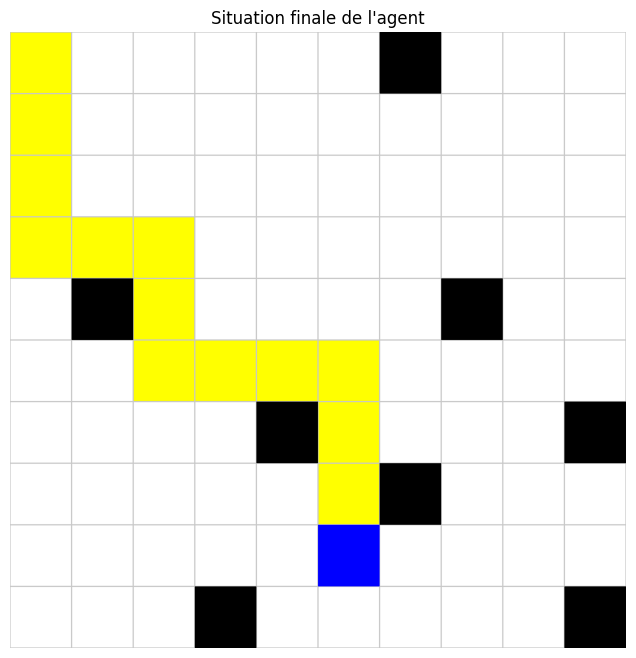

In [10]:
show_final_solution(env, best_q_table_q, learnin_type)
show_final_state(learnin_type)

In [11]:
learnin_type = 'sarsa'
best_rewards_sarsa, worst_rewards_sarsa, best_parameters_sarsa, best_q_table_sarsa = change_hyperparameters('SARSA')

Total time: 6.123089790344238
Best parameters: {'alpha': 0.2, 'gamma': 0.9, 'epsilon': 0.4, 'episodes': 300, 'reward': np.float64(5.947942460873602)}


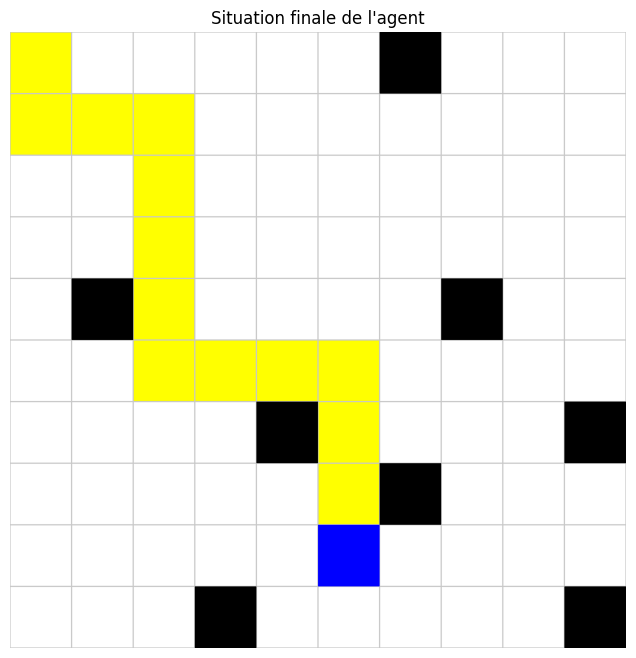

In [13]:
show_final_solution(env, best_q_table_sarsa, learnin_type)
show_final_state(learnin_type)